In [2]:
import os
import csv
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

year = "2020"
List=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
List_index = 2
arrival = 13
departure = 18

fname = 'C:/Users/ASUS/Music/ggg'
f = open(fname + '.csv', 'w')
wr = csv.writer(f)

f.write("Date")
f.write(',')
f.write("Day")
f.write(',')
f.write("Arrival")
f.write(',')
f.write("Departure")
f.write('\n')

for month in range (1,13):
    if month == 2:
        day_end = 28
    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        day_end = 31
    elif month==4 or month==6 or month==9 or month==11:
        day_end = 30
    for day in range (1,day_end+1):
        if month < 10 and day < 10:
            string = str.format("{}-0{}-0{}",year,month,day)
        elif month < 10 and day >= 10:
            string = str.format("{}-0{}-{}",year,month,day)
        elif month >= 10 and day < 10:
            string = str.format("{}-{}-0{}",year,month,day)
        else:
            string = str.format("{}-{}-{}",year,month,day)
        # 월요일, 목요일은 늦게 출/퇴근함
        if List_index == 0:
            arrival=arrival+3
            departure=departure+3
        if List_index == 3:
            arrival=arrival+2
            departure=departure+2
        f.write(string)
        f.write(',')
        f.write(List[List_index])
        f.write(',')
        f.write(str(arrival))
        f.write(',')
        f.write(str(departure))
        f.write('\n')
        List_index=(List_index+1)%7
        arrival=13
        departure=18
        arrival=arrival+(random.randint(-60,50)/30)
        departure=departure+(random.randint(-40,60)/30)

f.close()

In [3]:
ulala = pd.read_csv("../Music/ggg.csv")
ulala.head(5)

,Date,Day,Arrival,Departure
0,2020-01-01,Wed,13.000000,18.000000
1,2020-01-02,Thu,16.566667,20.800000
2,2020-01-03,Fri,11.300000,19.066667
3,2020-01-04,Sat,12.600000,19.266667
4,2020-01-05,Sun,13.266667,16.833333


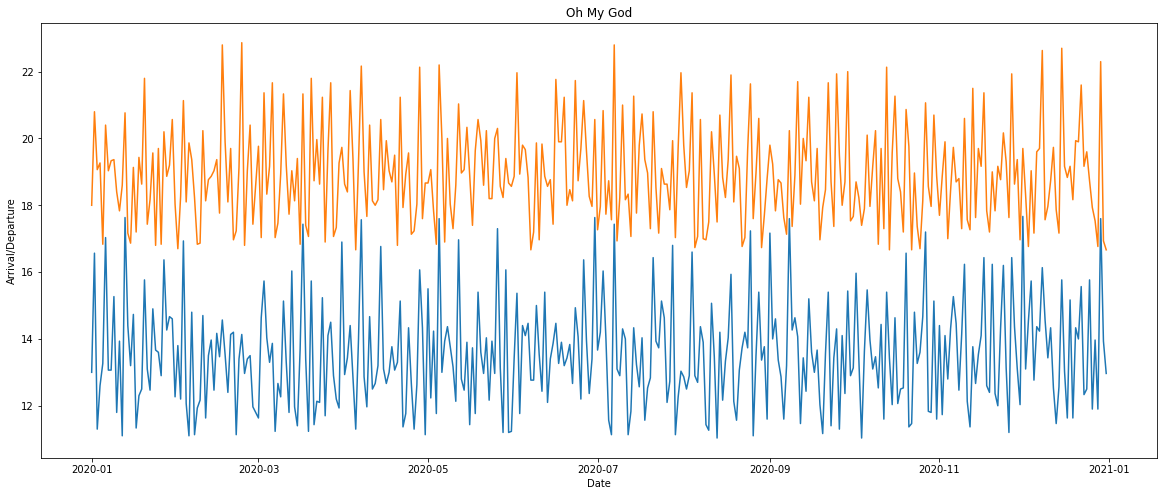

In [4]:
ulala["Date"] = pd.to_datetime(ulala["Date"])
plt.figure(figsize=(20,8))
plt.plot(ulala.Date,ulala.Arrival)
plt.plot(ulala.Date,ulala.Departure)
plt.title("Oh My God")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
# plt.legend() --> handle 있어야 함
plt.show()

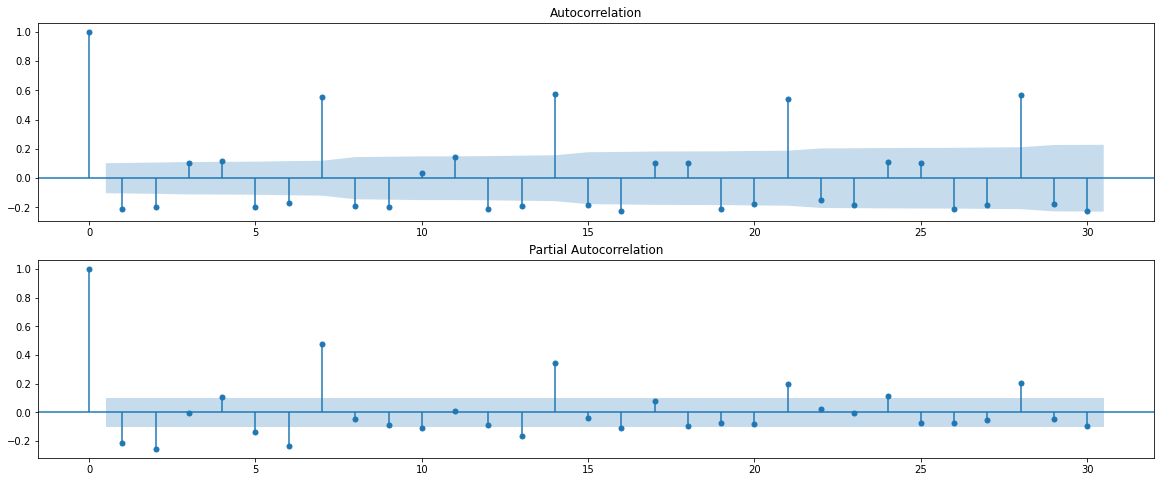

In [5]:
import statsmodels.api as sm

timeSeriesA = ulala.loc[:, ["Date","Arrival"]]
timeSeriesA.index = timeSeriesA.Date
tsA = timeSeriesA.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA, lags=30, ax=ax2)

# 생각보다 훨씬 쉬움!!!

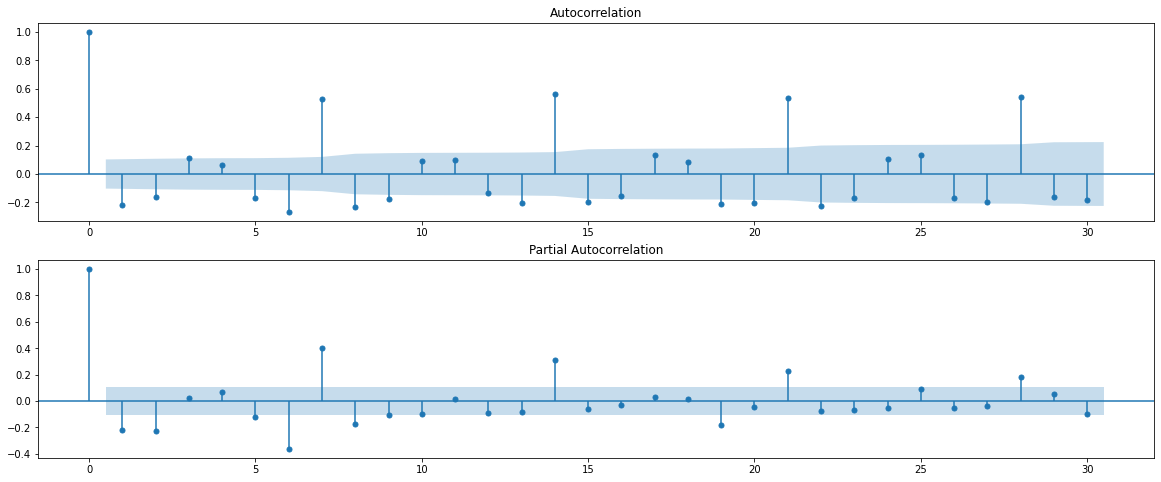

In [6]:
timeSeriesD = ulala.loc[:, ["Date","Departure"]]
timeSeriesD.index = timeSeriesD.Date
tsD = timeSeriesD.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsD, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsD, lags=30, ax=ax2)

<Figure size 432x288 with 0 Axes>

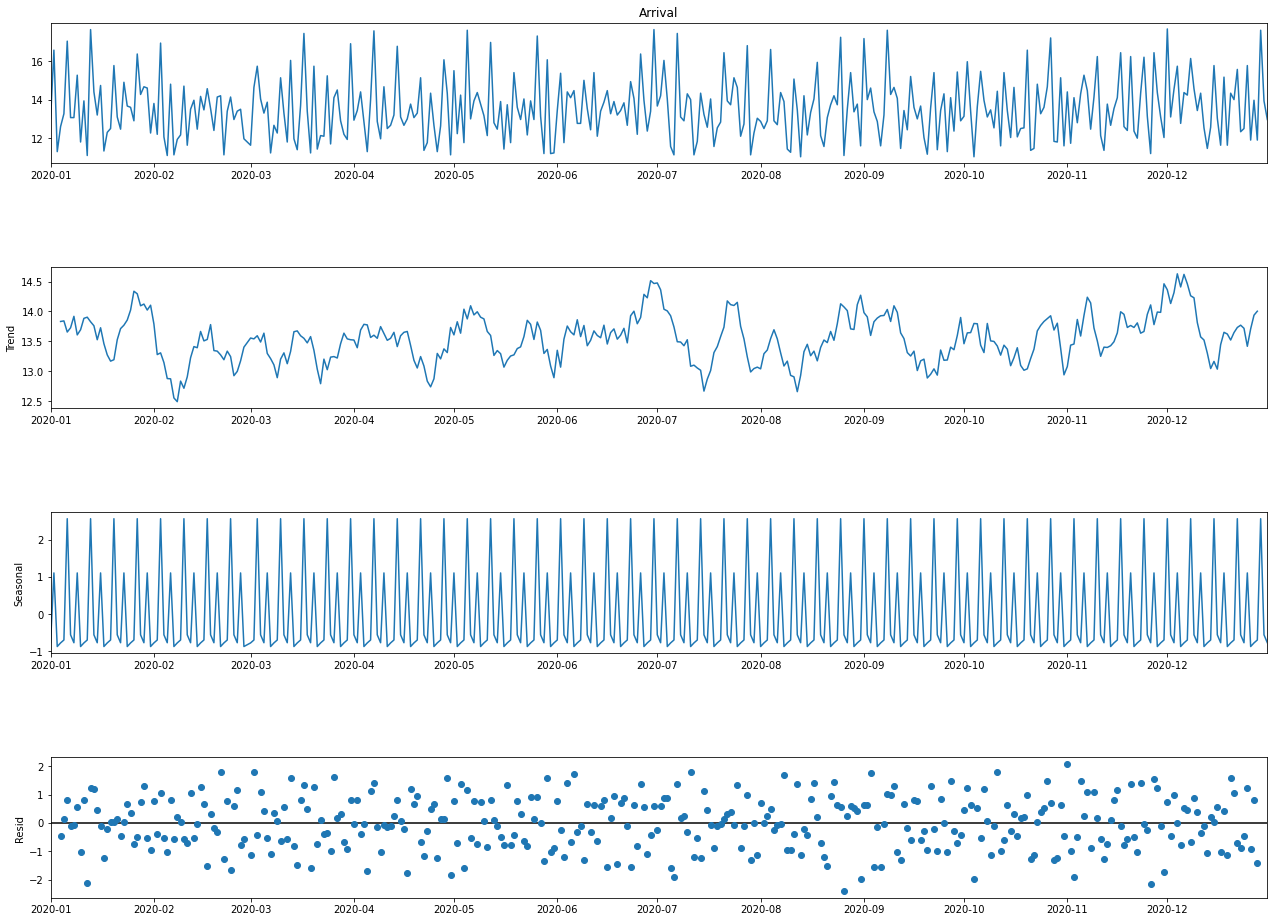

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultA = seasonal_decompose(tsA['Arrival'], model='additive',period=7)

fig = plt.figure()
fig = resultA.plot()
fig.set_size_inches(20, 15)

<Figure size 432x288 with 0 Axes>

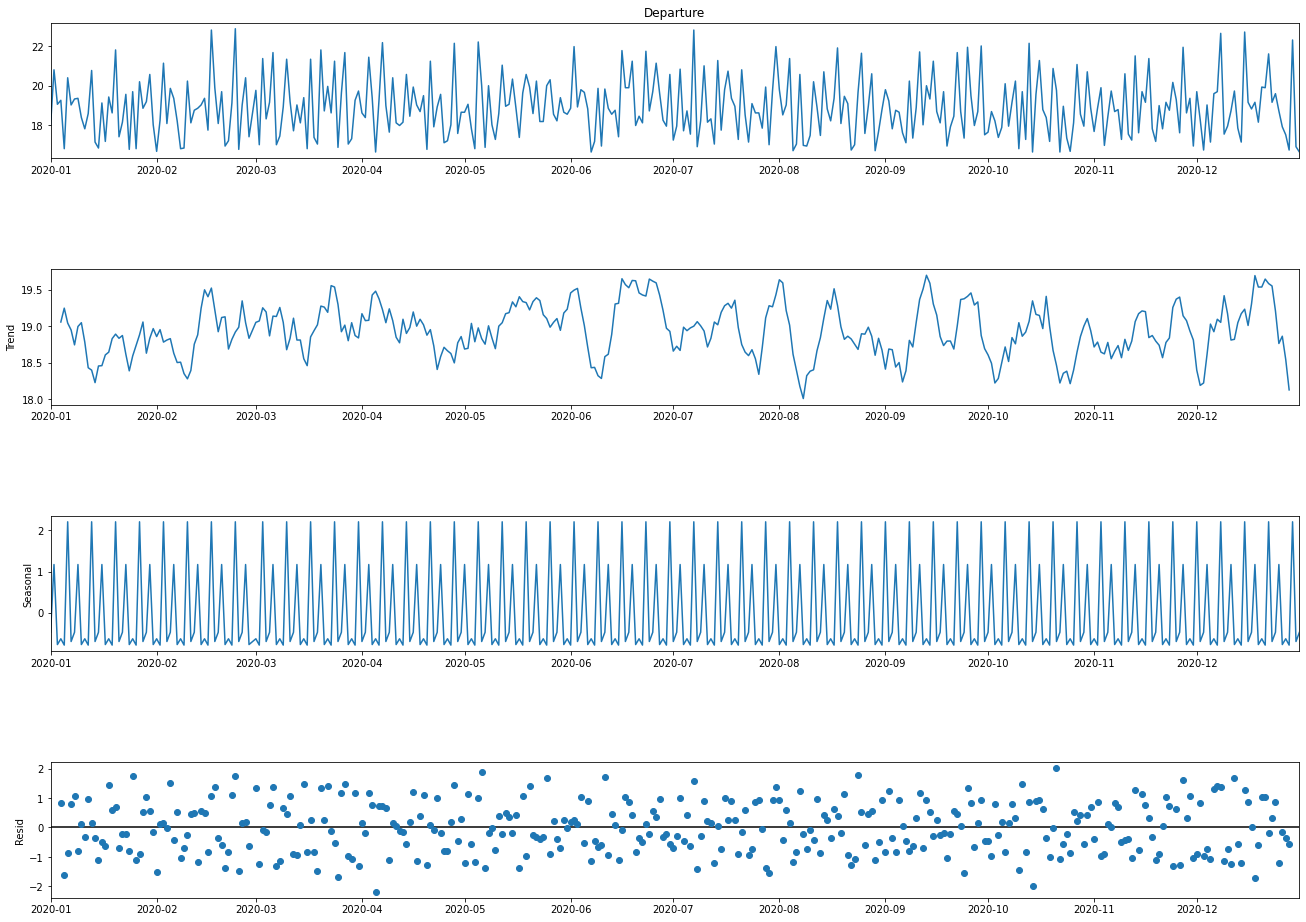

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultD = seasonal_decompose(tsD['Departure'], model='additive',period=7)

fig = plt.figure()
fig = resultD.plot()
fig.set_size_inches(20, 15)

In [9]:
"""
tsA_diff = tsA - tsA.shift()
fig = plt.figure(figsize=(20,8))
# plt.plot(ts_diff)

ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)
"""

'\ntsA_diff = tsA - tsA.shift()\nfig = plt.figure(figsize=(20,8))\n# plt.plot(ts_diff)\n\nax3 = fig.add_subplot(211)\nfig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)\nax4 = fig.add_subplot(212)\nfig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)\n'

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, bu

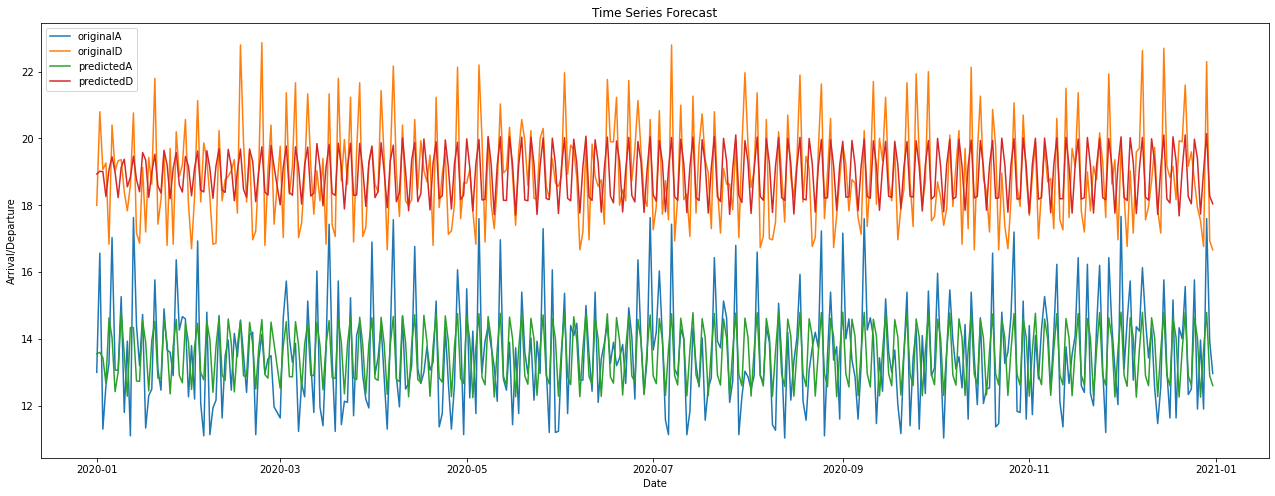

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import datetime

#fit model
modelA = ARIMA(tsA, order=(2,0,2))
modelA_fit = modelA.fit()
modelD = ARIMA(tsD, order=(2,0,2))
modelD_fit = modelD.fit()

#predict
forecastA = modelA_fit.predict(typ='levels')
forecastD = modelD_fit.predict(typ='levels')

#visualization
plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")

plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")

plt.legend()
plt.show()